# **Task #1**





**Importing required modules**

In [ ]:
import torch.nn as nn
from torch.nn import Conv2d,ReLU,MaxPool2d
import torch.utils.model_zoo as model_zoo
import skimage.io as io
import numpy as np
import skimage.transform as trans
import torchvision.models as models
import torch
from torch.autograd import Variable
import regex
from google.colab import drive
from torchvision import transforms
import os
import pickle
import matplotlib.pyplot as plt
from PIL import Image
import torchvision
from torchvision import datasets, models, transforms

**Defining VGG16 architecture**

In [ ]:
class VGG16(torch.nn.Module):
  def __init__(self,pretrained=True):
    super(VGG16,self).__init__()
    inplace=True
    self.conv1=Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.relu1= ReLU(inplace)
    self.conv2= Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.relu2= ReLU(inplace)
    self.maxpool2= MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    self.conv3= Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.relu3=ReLU(inplace)
    self.conv4= Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.relu4= ReLU(inplace)
    self.maxpool4= MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    self.conv5= Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.relu5= ReLU(inplace)
    self.conv6= Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.relu6= ReLU(inplace)
    self.conv7= Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.relu7= ReLU(inplace)
    self.maxpool7= MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    self.conv8= Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.relu8= ReLU(inplace)
    self.conv9= Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.relu9= ReLU(inplace)
    self.conv10= Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.relu10= ReLU(inplace)
    self.maxpool10= MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    self.conv11= Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.relu11= ReLU(inplace)
    self.conv12= Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.relu12= ReLU(inplace)
    self.conv13= Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.relu13 =ReLU(inplace)
    self.maxpool13= MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    self.linear1=torch.nn.Linear(25088,4096)
    self.relu1=torch.nn.ReLU(True)
    self.linear2=torch.nn.Linear(4096,4096)
    self.relu2=torch.nn.ReLU(True)
    self.linear3=torch.nn.Linear(4096,1000)
  def forward(self,input_data):
    x=input_data
    x=self.conv1(x)
    x=self.relu1(x)
    x=self.conv2(x)
    x=self.relu2(x)
    x=self.maxpool2(x)
    x=self.conv3(x)
    x=self.relu3(x)
    x=self.conv4(x)
    x=self.relu4(x)
    x=self.maxpool4(x)
    x=self.conv5(x)
    x=self.relu5(x)
    x=self.conv6(x)
    x=self.relu6(x)
    x=self.conv7(x)
    x=self.relu7(x)
    x=self.maxpool7(x)
    x=self.conv8(x)
    x=self.relu8(x)
    x=self.conv9(x)
    x=self.relu9(x)
    x=self.conv10(x)
    x=self.relu10(x)
    x=self.maxpool10(x)
    x=self.conv11(x)
    x=self.relu11(x)
    x=self.conv12(x)
    x=self.relu12(x)
    x=self.conv13(x)
    x=self.relu13(x)
    x=self.maxpool13(x)
    x = x.view(-1, self.num_flat_features(x))
    x=self.linear1(x)
    x=self.relu1(x)
    x=self.linear2(x)
    x=self.relu2(x)
    x=self.linear3(x)
    return x
  def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

**Loading Weights into my VGG16**

In [ ]:
model=VGG16()
dict_=model_zoo.load_url('https://download.pytorch.org/models/vgg16-397923af.pth')
l=[ "conv1.weight", "conv1.bias", "conv2.weight", "conv2.bias", "conv3.weight", "conv3.bias", "conv4.weight", "conv4.bias", "conv5.weight", "conv5.bias", "conv6.weight", "conv6.bias", "conv7.weight", "conv7.bias", "conv8.weight", "conv8.bias", "conv9.weight", "conv9.bias", "conv10.weight", "conv10.bias", "conv11.weight", "conv11.bias", "conv12.weight", "conv12.bias", "conv13.weight", "conv13.bias","linear1.weight", "linear1.bias", "linear2.weight", "linear2.bias", "linear3.weight", "linear3.bias"]
l2=["features.0.weight", "features.0.bias", "features.2.weight", "features.2.bias", "features.5.weight", "features.5.bias", "features.7.weight", "features.7.bias", "features.10.weight", "features.10.bias", "features.12.weight", "features.12.bias", "features.14.weight", "features.14.bias", "features.17.weight", "features.17.bias", "features.19.weight", "features.19.bias", "features.21.weight", "features.21.bias", "features.24.weight", "features.24.bias", "features.26.weight", "features.26.bias", "features.28.weight", "features.28.bias", "classifier.0.weight", "classifier.0.bias", "classifier.3.weight", "classifier.3.bias", "classifier.6.weight", "classifier.6.bias"]
new_dict={}
str_='i'
for count,i in enumerate(dict_.keys()):
  new_dict[l[count]]=dict_[i]
model.load_state_dict(new_dict)

**Defining preprocessing steps**

In [ ]:
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
test_transform = transforms.Compose([
    transforms.Scale(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])
trans2=transforms.Normalize(-np.array(mean), 1.0/np.array(std))

/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:208: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


**Loading Data from Google Drive (ImageNet labels as well as some images)**

In [ ]:
drive.mount('/content/gdrive')
PATH_OF_DATA= '/content/gdrive/"My Drive"/ILVSCR-12/ILVSCR-12'
r=regex.compile("[A-Za-z]+")
with open('gdrive/My Drive/data/names.txt') as file:
  names=file.read().split('\n')
imagenet_labels=[]
for i in names:
  if (len(r.findall(i))>0):
    imagenet_labels.append(r.findall(i))
print (len(imagenet_labels))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
1000


**Comparing our model's result with actual vgg16 (loaded from model zoo)**

ILSVRC2012_val_00000047.JPEG


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


VGG from Model Zoo: p=12.673983573913574 and ind=565   My VGG: p=13.142717361450195 and ind=565 
ImageNet Label ['freight', 'car']


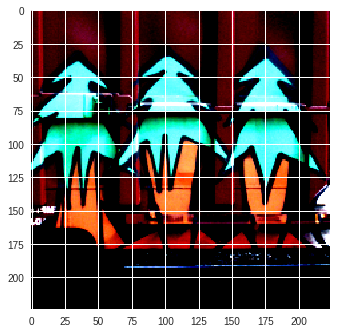

ILSVRC2012_val_00000054.JPEG


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


VGG from Model Zoo: p=24.88875961303711 and ind=591   My VGG: p=19.978111267089844 and ind=591 
ImageNet Label ['handkerchief', 'hankie', 'hanky', 'hankey']


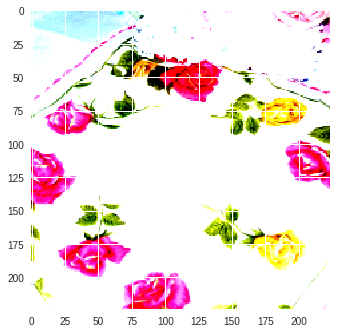

ILSVRC2012_val_00000012.JPEG


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


VGG from Model Zoo: p=21.027528762817383 and ind=286   My VGG: p=25.826629638671875 and ind=286 
ImageNet Label ['cougar', 'puma', 'catamount', 'mountain', 'lion', 'painter', 'panther', 'Felis', 'concolor']


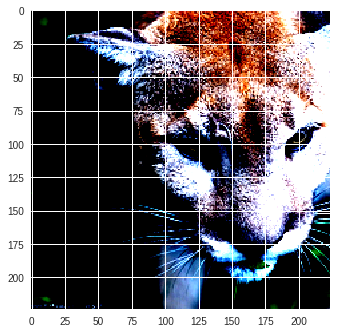

In [ ]:
vgg16 = models.vgg16(pretrained=True)
path='gdrive/My Drive/data/pic/pics'
images=os.listdir(path)
def get_img(path):
  im = Image.open(path)
  im=im.transpose(Image.ROTATE_90)
  img=np.array(test_transform(im))
  X=Variable(torch.from_numpy(img).reshape(1,*img.shape).type(torch.FloatTensor)
             ,requires_grad=False)
  return X
np.random.shuffle(images)
for i in images[1:4]:
  print (i)
  X=get_img(os.path.join(path,i))
  vgg_prob,vgg_ind = torch.max(vgg16(X),1)
  my_model_prob,my_model_ind = torch.max(model(X),1)
  print ('VGG from Model Zoo: p={} and ind={}   My VGG: p={} and ind={} '.format
         (vgg_prob.detach().numpy()[0],vgg_ind.detach().numpy()[0],my_model_prob.
          detach().numpy()[0],my_model_ind.detach().numpy()[0]))
  print ('ImageNet Label',imagenet_labels[vgg_ind])
  plt.imshow(X.numpy().squeeze().transpose([2,1,0]))
  plt.show()

# **Task #2**

**Saving Weights**

In [ ]:
file_name=[ "conv1_weight", "conv1_bias", "conv2_weight", "conv2_bias", "conv3_weight", "conv3_bias", "conv4_weight", "conv4_bias", "conv5_weight", "conv5_bias", "conv6_weight", "conv6_bias", "conv7_weight", "conv7_bias", "conv8_weight", "conv8_bias", "conv9_weight", "conv9_bias", "conv10_weight", "conv10_bias", "conv11_weight", "conv11_bias", "conv12_weight", "conv12_bias", "conv13_weight", "conv13_bias","linear1_weight", "linear1_bias", "linear2_weight", "linear2_bias", "linear3_weight", "linear3_bias"]
parameters=list(model.parameters())
for ind,weight in enumerate(parameters):
   np.save(file_name[ind],weight.detach().numpy())

**Saving activations**

In [ ]:
class Activation_Saver(VGG16):
  def forward(self,input_data):
    x=input_data
    x=self.conv1(x)
    x=self.relu1(x)
    np.save('conv1_activation',x.detach().numpy())
    x=self.conv2(x)
    x=self.relu2(x)
    np.save('conv2_activation',x.detach().numpy())
    x=self.maxpool2(x)
    x=self.conv3(x)
    x=self.relu3(x)
    np.save('conv3_activation',x.detach().numpy())
    x=self.conv4(x)
    x=self.relu4(x)
    np.save('conv4_activation',x.detach().numpy())
    x=self.maxpool4(x)
    x=self.conv5(x)
    x=self.relu5(x)
    np.save('conv5_activation',x.detach().numpy())
    x=self.conv6(x)
    x=self.relu6(x)
    np.save('conv6_activation',x.detach().numpy())
    x=self.conv7(x)
    x=self.relu7(x)
    np.save('conv7_activation',x.detach().numpy())
    x=self.maxpool7(x)
    x=self.conv8(x)
    x=self.relu8(x)
    np.save('conv8_activation',x.detach().numpy())
    x=self.conv9(x)
    x=self.relu9(x)
    np.save('conv9_activation',x.detach().numpy())
    x=self.conv10(x)
    x=self.relu10(x)
    np.save('conv10_activation',x.detach().numpy())
    x=self.maxpool10(x)
    x=self.conv11(x)
    x=self.relu11(x)
    np.save('conv11_activation',x.detach().numpy())
    x=self.conv12(x)
    x=self.relu12(x)
    np.save('conv12_activation',x.detach().numpy())
    x=self.conv13(x)
    x=self.relu13(x)
    np.save('conv13_activation',x.detach().numpy())
    x=self.maxpool13(x)
    x = x.view(-1, self.num_flat_features(x))
    x=self.linear1(x)
    x=self.relu1(x)
    np.save('FC1_activation',x.detach().numpy())
    x=self.linear2(x)
    x=self.relu2(x)
    np.save('FC2_activation',x.detach().numpy())
    x=self.linear3(x)
    np.save('FC3_activation',x.detach().numpy())
    return x
saver=Activation_Saver()
X=get_img(os.path.join(path,images[0]))
vgg_prob,vgg_ind = torch.max(saver(X),1)

# **Task #4**

**Saving of Histogram along with min, max, avarage and variance of data**

In [ ]:
files=os.listdir('./')
for file in files:
  if (file[-4:]=='.npy'):
    arr=np.load(file)
    dict_={}
    hist=np.histogram(arr)
    dict_['hist']=hist
    min_=np.min(arr)
    dict_['min_']=min_
    max_=np.max(arr)
    dict_['max']=max_
    var=np.var(arr)
    dict_['var']=var
    with open(file[:-4]+'_hist.pkl','wb') as file:
        pickle.dump(dict_,file)

**Loading Histogram along with min, max, avarage and variance from file**

In [ ]:
files=os.listdir('./')
for file in files:
  if (file[-4:]=='.pkl'):
     with open(file,'rb') as file:
        dict_=pickle.load(file)
        print(dict_)

{'hist': (array([58537,  7674,  6562,  8521,  7330,  4777,  4490,  1706,   586,
         169]), array([0.        , 0.00229972, 0.00459944, 0.00689916, 0.00919888,
       0.0114986 , 0.01379832, 0.01609804, 0.01839776, 0.02069748,
       0.0229972 ])), 'min_': 0.0, 'max': 0.0229972, 'var': 2.7288825e-05}
{'hist': (array([  2,  13,  55, 180, 165,  57,  25,  10,   2,   3]), array([-0.322216  , -0.24376783, -0.16531966, -0.08687148, -0.00842331,
        0.07002486,  0.14847304,  0.22692121,  0.30536938,  0.38381756,
        0.46226573])), 'min_': -0.322216, 'max': 0.46226573, 'var': 0.009806979}
{'hist': (array([61098,  6478,  7570,  7741,  5218,  4719,  3749,  2658,   904,
         217]), array([0.        , 0.00221366, 0.00442731, 0.00664097, 0.00885462,
       0.01106828, 0.01328193, 0.01549559, 0.01770924, 0.0199229 ,
       0.02213656])), 'min_': 0.0, 'max': 0.022136556, 'var': 2.6006002e-05}
{'hist': (array([     6,    144,  64234, 516595,   8639,    189,     14,      2,
            0

# **Task #3**

**Data loading using torchvision's dataloader**

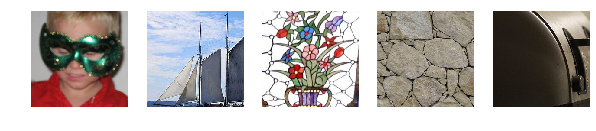

In [ ]:
#preparing the dataloader for testing the network
data_transforms = transforms.Compose([
                    transforms.CenterCrop(224),
                    transforms.ToTensor()])
def get_random_images(num):
    data = torchvision.datasets.ImageFolder(root= '/content/gdrive/My Drive/ILVSCR-12',transform=data_transforms)
    indices = list(range(len(data)))
    np.random.shuffle(indices)
    idx = indices[:num]
    from torch.utils.data.sampler import SubsetRandomSampler
    sampler = SubsetRandomSampler(idx)
    loader = torch.utils.data.DataLoader(data, 
                   sampler=sampler, batch_size=num)
    dataiter = iter(loader)
    images, labels = dataiter.next()
    return images, labels

  
  # To plot randomly selected images
to_pil = transforms.ToPILImage()
n = 5 #number of input parameters
images, labels = get_random_images(n)
fig=plt.figure(figsize=(10,10))
for ii in range(len(images)):
    image = to_pil(images[ii])
    sub = fig.add_subplot(1, len(images), ii+1)
    plt.axis('off')
    plt.imshow(image)